# Mathematische Modelle zur Beschreibung von Daten

Wir haben letzte Woche einen Datensatz von handgeschriebenen Ziffern eingelesen. Diese waren im csv-Format gespeichert. Wir haben die handgeschriebenen Ziffern visualisiert und eine Reihe an Statistiken auf den Daten berechnet. 

In einem anderen Notebook, haben wir uns Wahrscheinlichkeitsverteilungen angeschaut. Wir haben zu den Wahrscheinlichkeitsverteilungen Zufallszahlen generiert und diese zusammen mit den Wahrscheinlichkeitsdichtefunktionen visualisiert.

Anhand eines weiteren Datensatzes (https://datahub.io/core/global-temp#data) wollen wir nun die zwei Welten zusammenbringen und ein neues Datenformat (JSON) kennenlernen. Wir wollen diese Daten einlesen und anhand von mathematischen Modellfunktionen beschreiben. Bei dem Datensatz handelt es sich um die monatlichen Temperaturmittelwerte für die gesammte Erde.

---

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

Wie wir sehen, handelt es sich immernoch um eine Textdatei. Diese ist jedoch in einem grundsätzlich anderen Format aufgebaut. Jedoch gibt es auch hier bereits fertige Interpreter in pandas:

In [2]:
data = pd.read_json("monthly_json.json") 

In [3]:
data.head()

,Date,Mean,Source
0,2016-12-06,0.7895,GCAG
1,2016-12-06,0.8100,GISTEMP
2,2016-11-06,0.7504,GCAG
3,2016-11-06,0.9300,GISTEMP
4,2016-10-06,0.7292,GCAG


Zunächst will ich die Daten etwas umformatieren, so dass das Datum zum index des Dataframes wird und die verschiedenen Quellen (Source) als Spalten dargestellt werden. Dazu nutze ich die Pivot-Funktion von pandas:

In [4]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')

In [5]:
pivot_df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


Wie ich aus der Beschreibung der Daten weiß, handelt es sich um einen zeitlichen Verlauf der Temperaturmittelwerte. Diesen will ich zunächst einmal visualisieren um ein gefühl dafür zu bekommen.

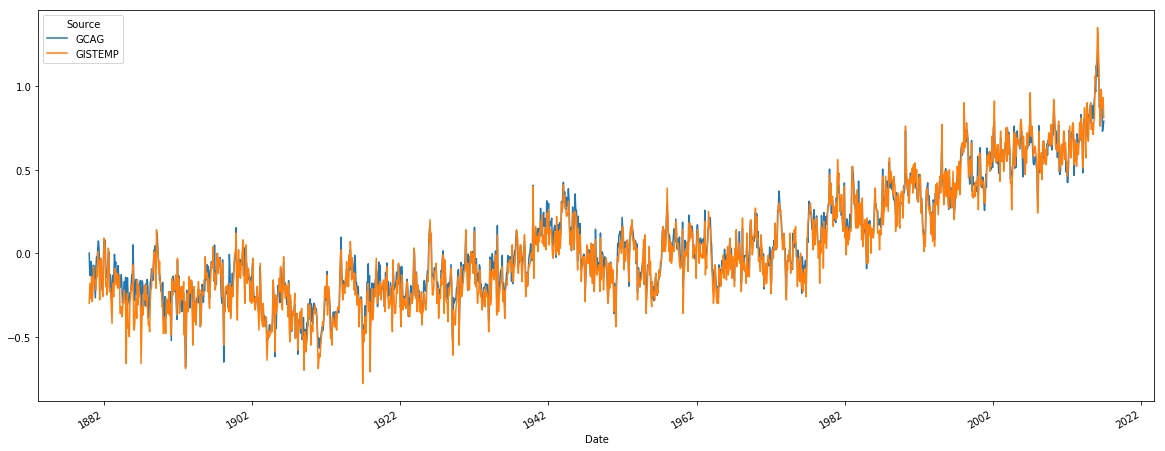

In [6]:
pivot_df.plot(figsize=(20, 8),);

In [7]:
pivot_df['GCAG']

Date
1880-01-06    0.0009
1880-02-06   -0.1229
1880-03-06   -0.1357
1880-04-06   -0.0499
1880-05-06   -0.0738
1880-06-06   -0.1692
1880-07-06   -0.1491
1880-08-06   -0.0725
1880-09-06   -0.0817
1880-10-06   -0.1786
1880-11-06   -0.2672
1880-12-06   -0.0775
1881-01-06   -0.0205
1881-02-06   -0.0296
1881-03-06    0.0348
1881-04-06    0.0734
1881-05-06    0.0284
1881-06-06   -0.0892
1881-07-06   -0.0329
1881-08-06   -0.0519
1881-09-06   -0.1824
1881-10-06   -0.2207
1881-11-06   -0.2194
1881-12-06   -0.0439
1882-01-06    0.0883
1882-02-06    0.0385
1882-03-06    0.0754
1882-04-06   -0.1241
1882-05-06   -0.1459
1882-06-06   -0.1391
               ...  
2014-07-06    0.6988
2014-08-06    0.7986
2014-09-06    0.7872
2014-10-06    0.7851
2014-11-06    0.6895
2014-12-06    0.8308
2015-01-06    0.8141
2015-02-06    0.8843
2015-03-06    0.8969
2015-04-06    0.7741
2015-05-06    0.8584
2015-06-06    0.8835
2015-07-06    0.8072
2015-08-06    0.8746
2015-09-06    0.9260
2015-10-06    0.9913
2015-11-

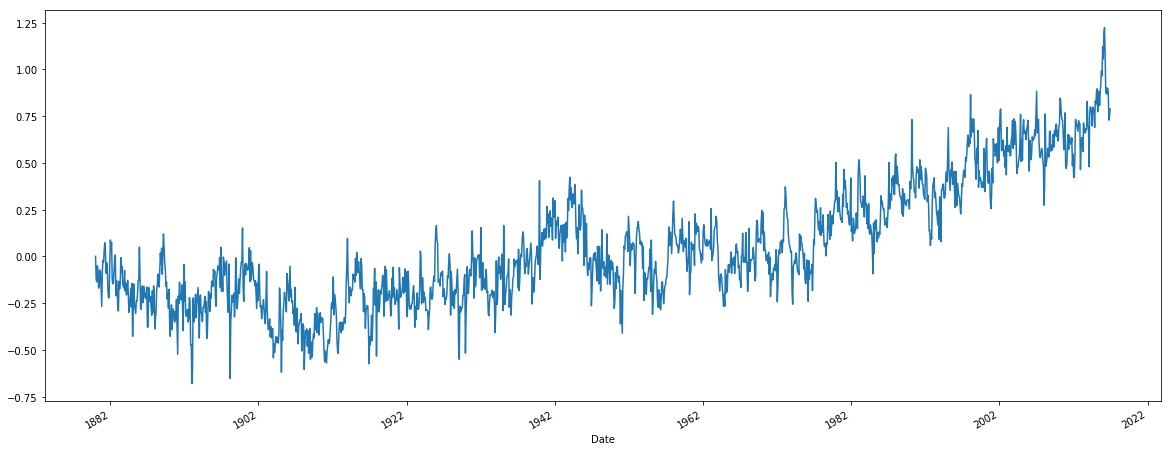

In [9]:
GCAG_data = pivot_df['GCAG'].plot(figsize=(20,8))

In [29]:
GCAG_data = pivot_df['GCAG']
#print(type(GCAG_data))
X = GCAG_data.index.values.astype(np.int64)/10000000
X = X.reshape(-1,1)
X


array([[-2.8397088e+11],
       [-2.8370304e+11],
       [-2.8345248e+11],
       ...,
       [ 1.4757120e+11],
       [ 1.4783904e+11],
       [ 1.4809824e+11]])

In [30]:
y = pivot_df['GCAG'].values

# KN Regression

In [31]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X, y) 
pred = neigh.predict(X)
pred

array([ 0.0009, -0.1229, -0.1357, ...,  0.7292,  0.7504,  0.7895])

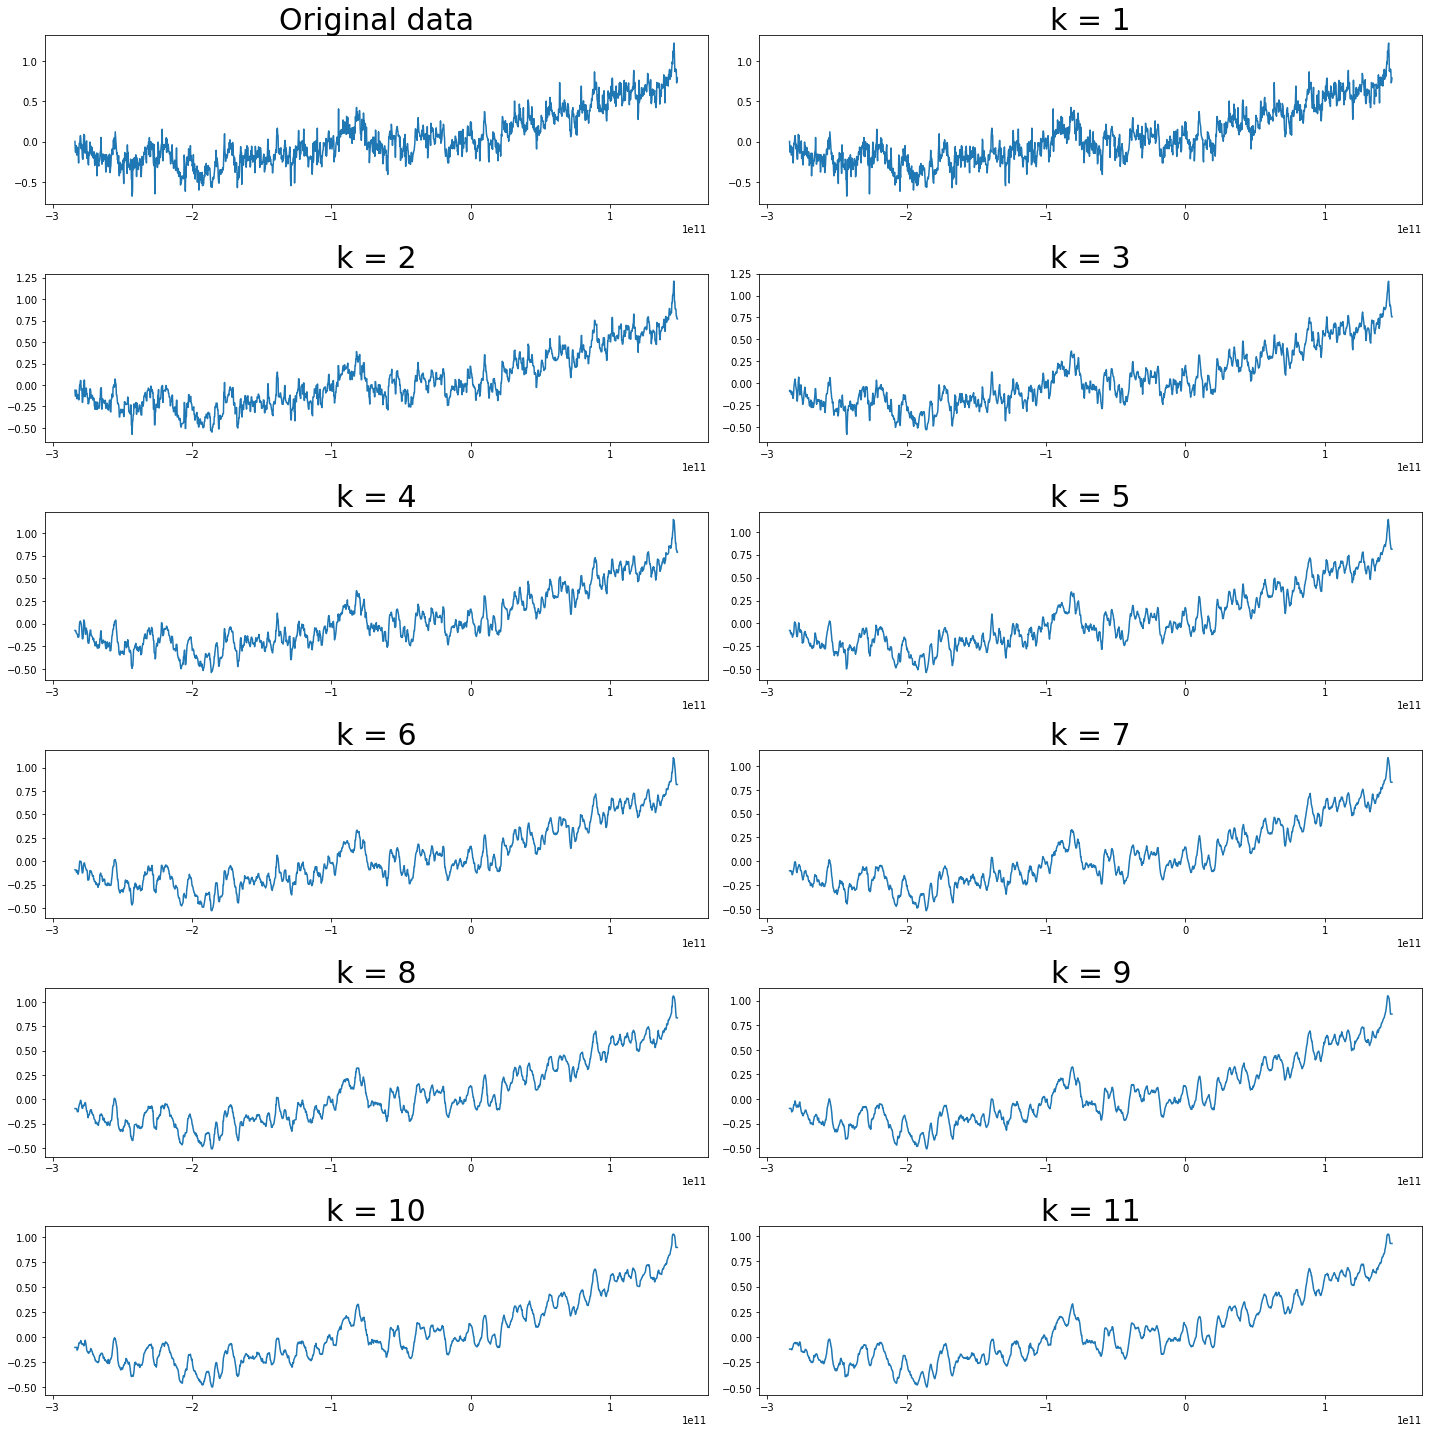

In [81]:
fig = plt.figure(figsize=(20,20))
plt.subplot(6,2,1)
plt.plot(X,y)
plt.title("Original data",fontsize = 30)
for k in range(1,12):
    neigh = KNeighborsRegressor(n_neighbors=k,weights = "uniform")
    neigh.fit(X, y) 
    pred = neigh.predict(X)
    plt.subplot(6,2,k+1)
    plt.plot(X,pred)
    plt.title(f"k = {k}",fontsize=30)
    plt.tight_layout()

---

In [83]:
# kleiner exkurs zum settingwithcopywarning
"""
data2 = pd.read_json("monthly_json.json")
mytestdf = data2.pivot(index='Date', columns='Source', values='Mean')
double_brack = mytestdf[['GCAG']] # warning verschwindet wenn hier .copy() hintendran
double_brack
via_series = mytestdf['GCAG'] # warning verschwindet wenn hier .copy() hintendran
via_series_df = pd.DataFrame(via_series)
via_series_df

double_brack.loc["1880-01-06","GCAG"] = 99 # urspr. nicht verändert
via_series_df.iloc[0,0] = 999 # urspr. nicht verändert
"""

# Lineare Regression

In [50]:
from sklearn import linear_model

In [52]:
lin = linear_model.LinearRegression()
lin.fit(X, y) 
pred_lin = lin.predict(X)
pred_lin

array([-0.41810097, -0.41752209, -0.41698056, ...,  0.51458532,
        0.5151642 ,  0.51572441])

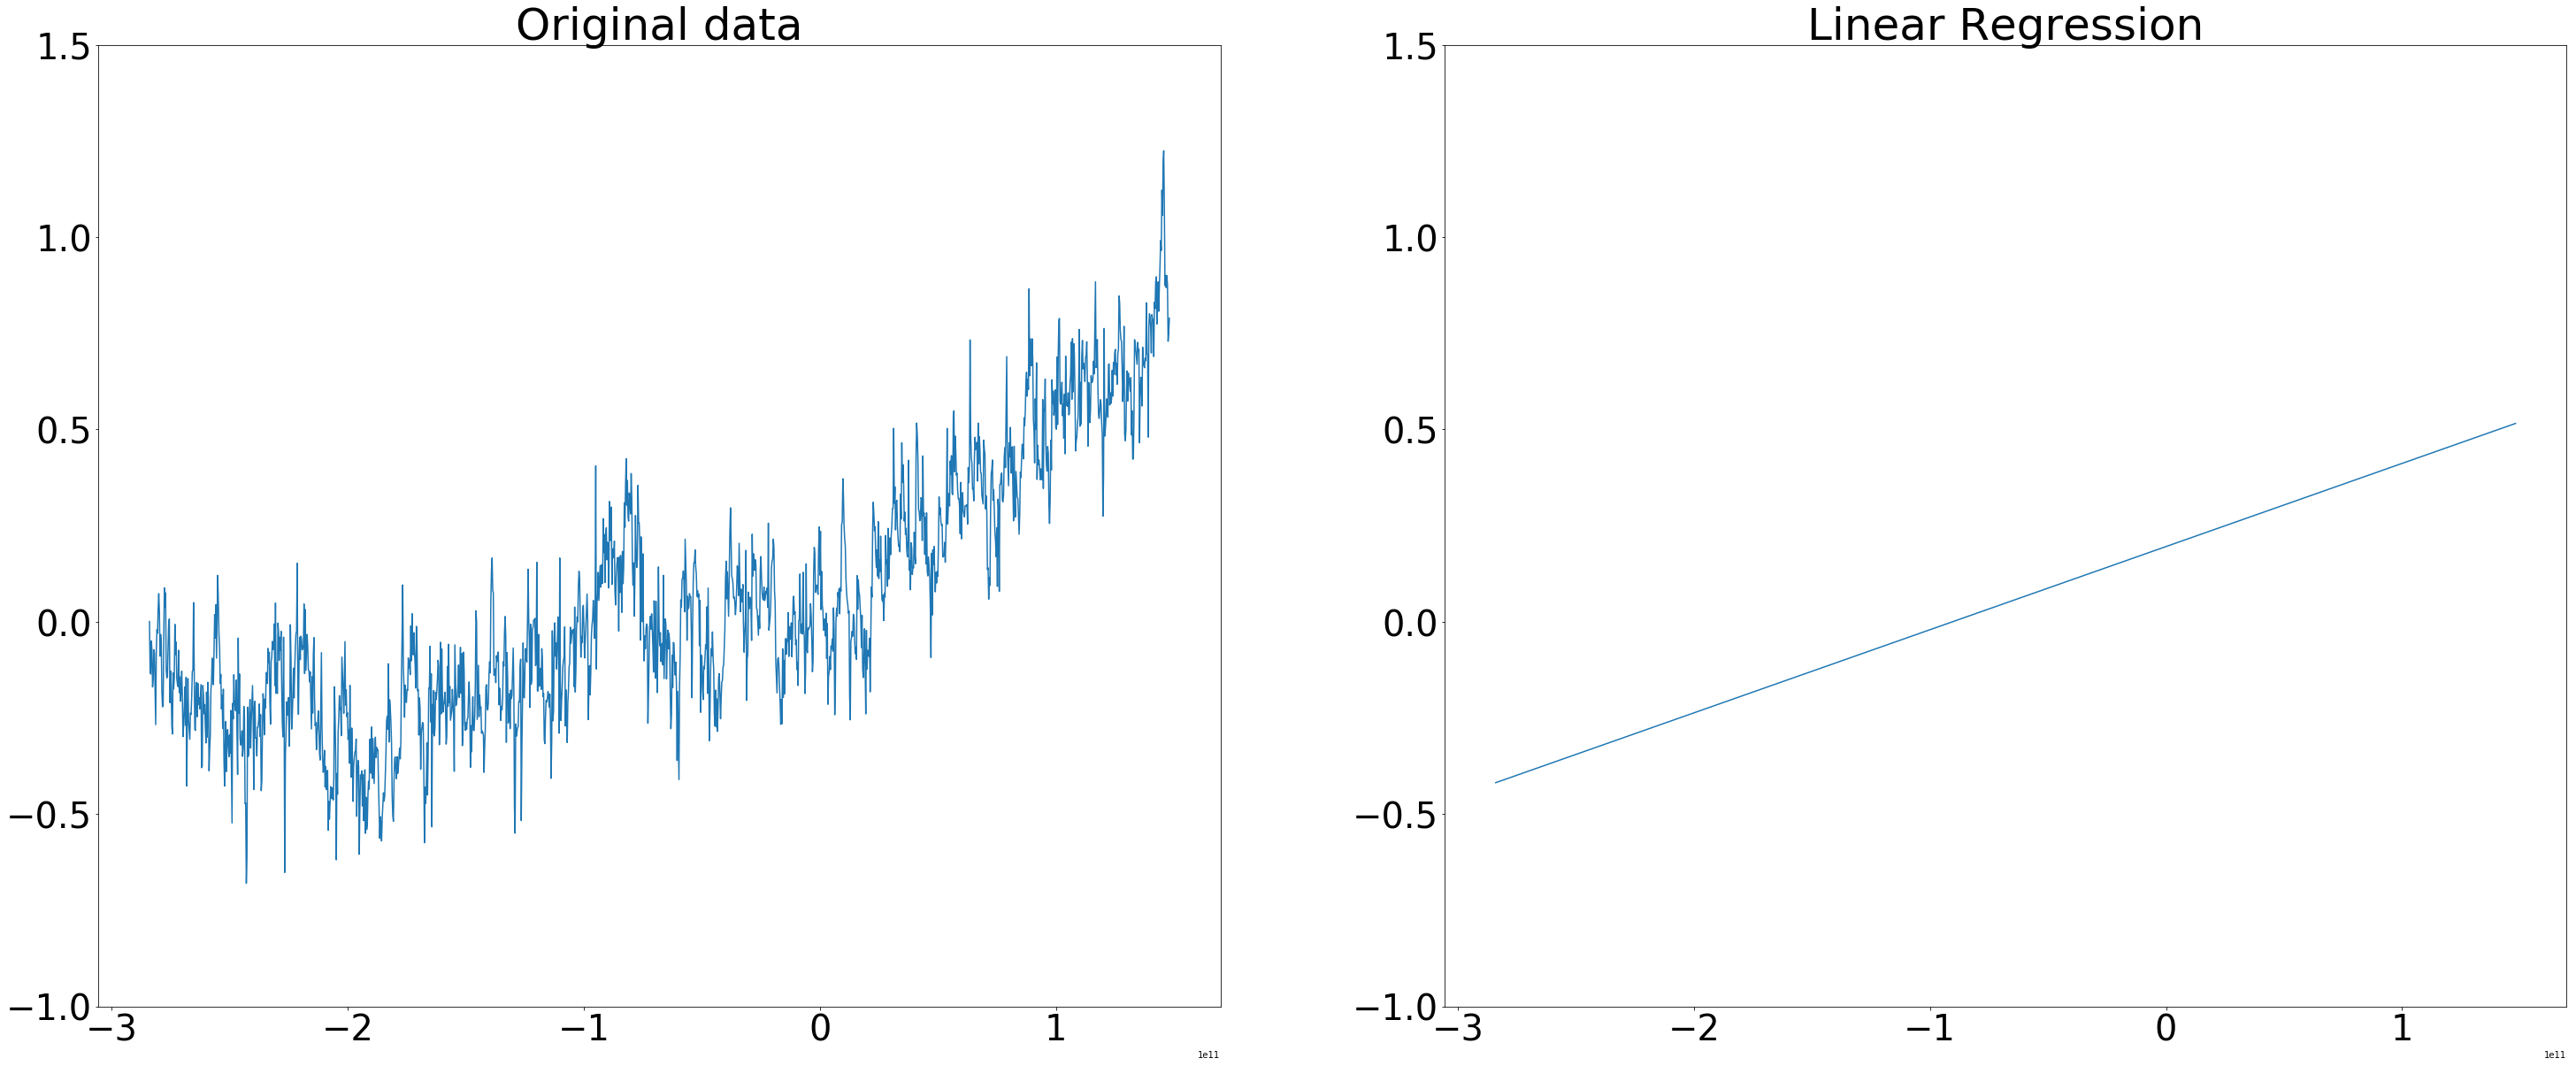

In [78]:
fig_lin = plt.figure(figsize=(50,20))
plt.subplot(121)
plt.title("Original data",fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylim(-1,1.5)
plt.plot(X,y)
plt.subplot(122)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Linear Regression",fontsize=50)
plt.ylim(-1,1.5)
plt.plot(X,pred_lin)

- split in training and test (80: 20 %. 1) within x-range, random selection 2) for future
- try knr and linreg. plot both. calculate error for each for 1) and 2)

tabelle: 
error- rate in zeile, spalten: 1) for knr and linreg and 2)for knr and linreg

# Split in training and test set

In [101]:
from sklearn.model_selection import train_test_split
# Variante 1: within x range
train_X_within, test_X_within, train_y_within,test_y_within = train_test_split(X, y,test_size=0.2, random_state=42)
# Variante 2: outside of x range
train_X_outside, test_X_outside, train_y_outside,test_y_outside = train_test_split(X, y,test_size=0.2, random_state=42, shuffle = False)

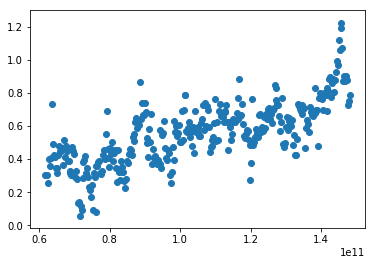

In [113]:
plt.scatter(test_X_outside,test_y_outside)

In [210]:
test_X_within

array([[-1.0541664e+11],
       [ 5.5555200e+09],
       [ 1.1468736e+11],
       [ 8.4983040e+10],
       [-1.1041056e+11],
       [-1.1802240e+10],
       [-6.2294400e+10],
       [-5.5978560e+10],
       [ 1.0944288e+11],
       [-2.1271680e+11],
       [-1.6195680e+11],
       [ 1.3601088e+11],
       [-6.7996800e+09],
       [ 1.4020128e+11],
       [-1.0146816e+11],
       [-1.6249248e+11],
       [-1.5696288e+11],
       [-1.4671584e+11],
       [ 6.0272640e+10],
       [-1.2856320e+11],
       [ 8.9968320e+10],
       [ 3.0542400e+10],
       [ 5.2963200e+09],
       [-1.2067488e+11],
       [ 4.5014400e+09],
       [ 8.7177600e+09],
       [-1.5643584e+11],
       [-1.7457984e+11],
       [ 1.0418112e+11],
       [-2.6555904e+11],
       [ 2.2403520e+10],
       [-2.3058432e+11],
       [-1.4169600e+10],
       [-1.8903456e+11],
       [-1.1724480e+11],
       [ 2.2135680e+10],
       [ 3.0801600e+10],
       [-2.1166272e+11],
       [-2.7635040e+11],
       [ 5.0535360e+10],


# Plots for within xrange

In [134]:
# KNR and LinReg plots
# for 1) (within)

knr_within = KNeighborsRegressor(n_neighbors=5,weights = "uniform")
knr_within.fit(train_X_within, train_y_within) 
knr_within_pred = knr_within.predict(test_X_within)

linr_within = linear_model.LinearRegression()
linr_within.fit(train_X_within, train_y_within) 
pred_tr_linr_within = linr_within.predict(train_X_within)
pred_linr_within = linr_within.predict(test_X_within)
#pred_linr_within

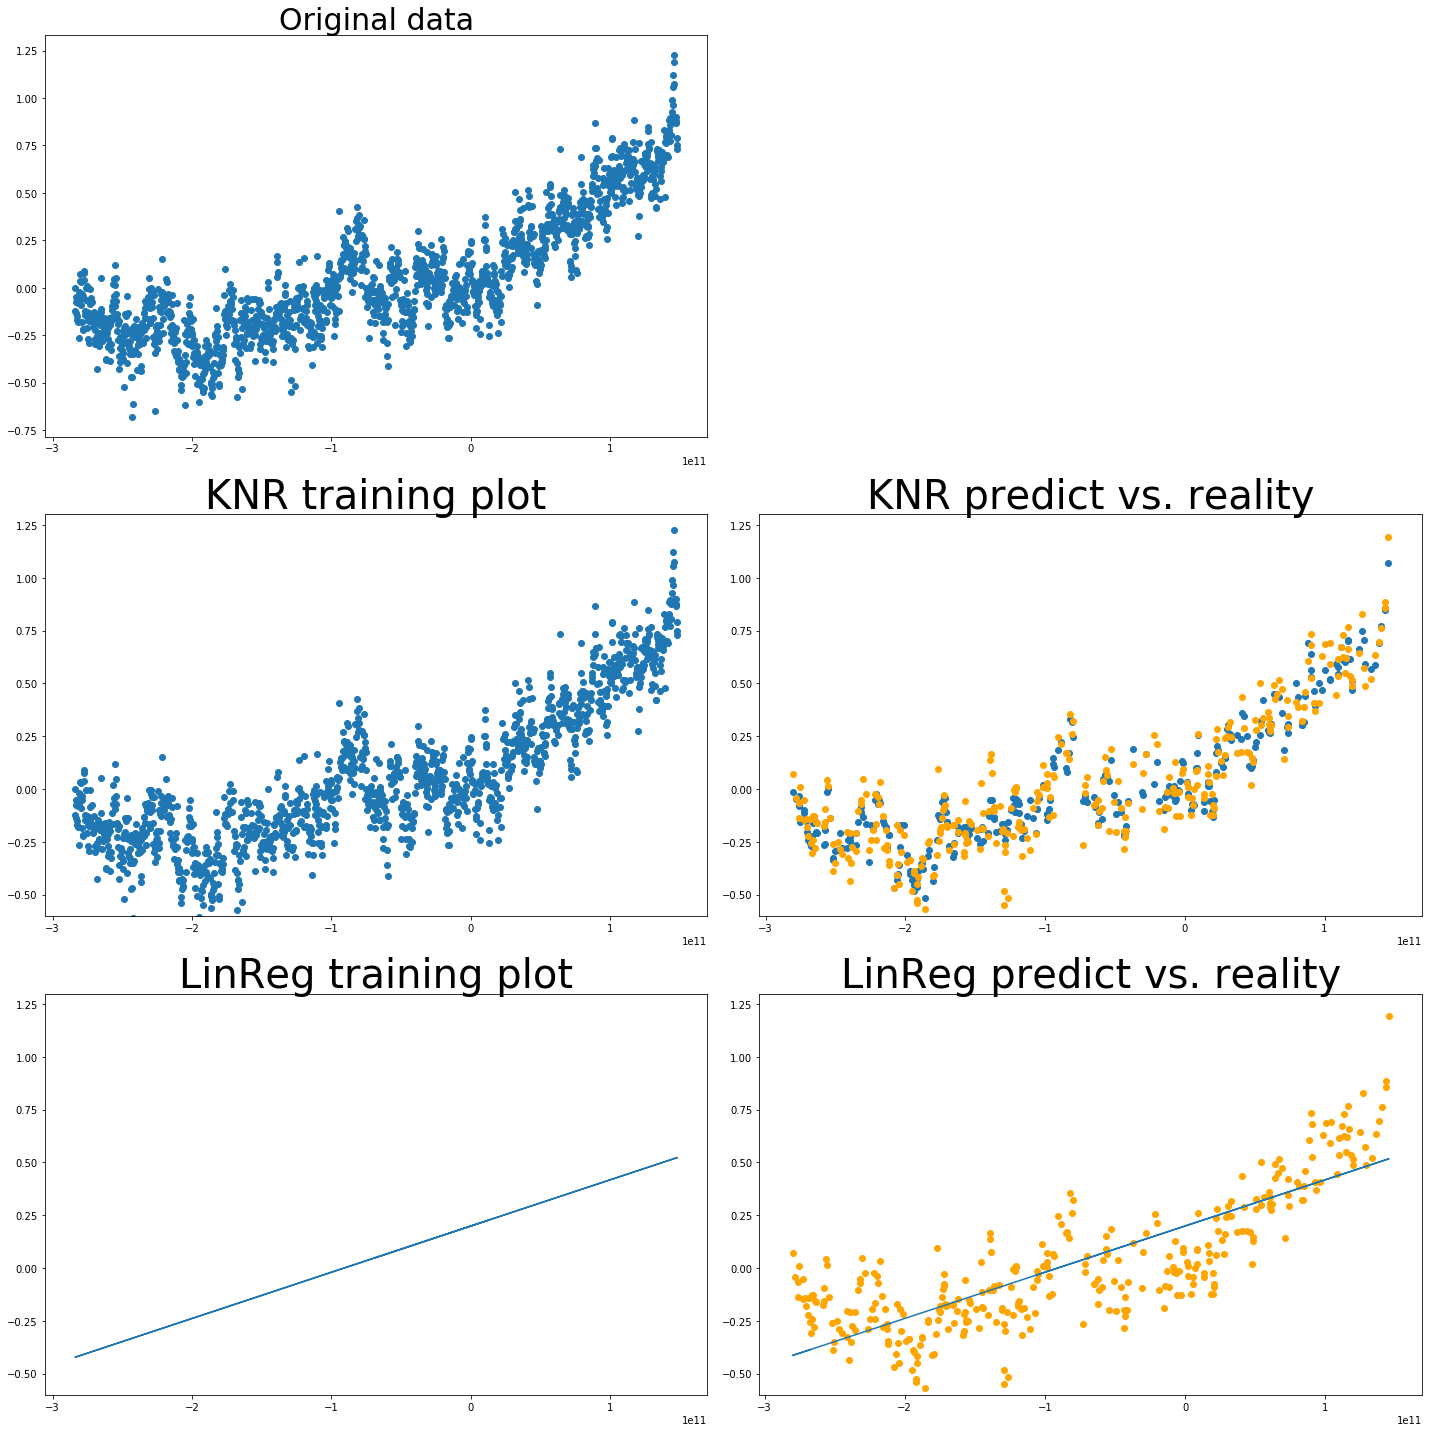

In [217]:
fig = plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.scatter(X,y)
plt.title("Original data",fontsize = 30)

plt.subplot(3,2,3)
plt.title("KNR training plot",fontsize = 40)
plt.ylim(-0.6,1.3)
plt.scatter(train_X_within,train_y_within)
plt.subplot(3,2,4)
plt.title("KNR predict vs. reality",fontsize = 40)
plt.scatter(test_X_within,knr_within_pred)
plt.scatter(test_X_within,test_y_within,color="orange")
plt.ylim(-0.6,1.3)
plt.tight_layout()

plt.subplot(3,2,5)
plt.title("LinReg training plot",fontsize = 40)
plt.plot(train_X_within,pred_tr_linr_within)
plt.ylim(-0.6,1.3)
plt.subplot(3,2,6)
plt.title("LinReg predict vs. reality",fontsize = 40)
plt.plot(test_X_within,pred_linr_within)
plt.scatter(test_X_within,test_y_within,color="orange")
plt.ylim(-0.6,1.3)
plt.tight_layout()

# Plots for outside xrange

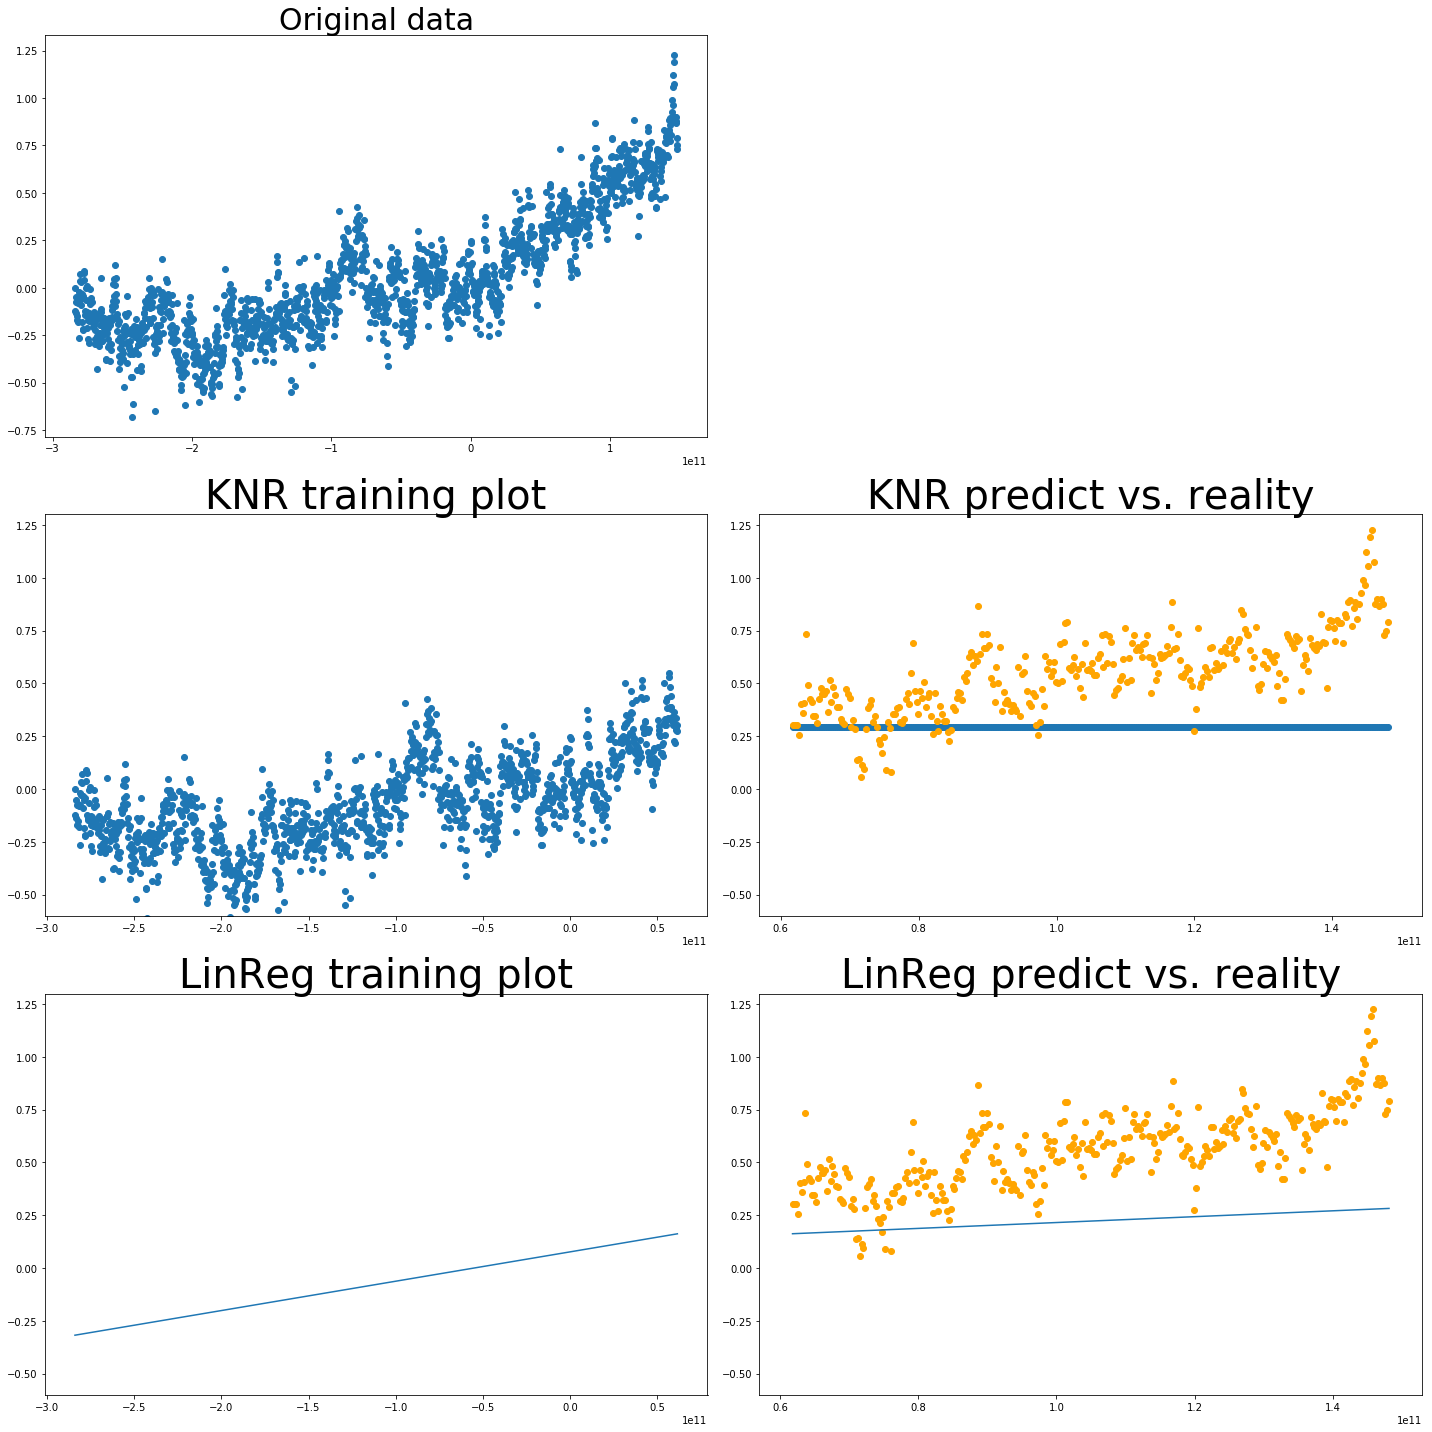

In [146]:
# KNR and LinReg plots
# for 2) (outside)

knr_outs = KNeighborsRegressor(n_neighbors=5,weights = "uniform")
knr_outs.fit(train_X_outside, train_y_outside) 
knr_outs_pred = knr_outs.predict(test_X_outside)

linr_outs = linear_model.LinearRegression()
linr_outs.fit(train_X_outside, train_y_outside) 
pred_tr_linr_outs = linr_outs.predict(train_X_outside)
pred_linr_outs = linr_outs.predict(test_X_outside)
pred_linr_outs

fig = plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.scatter(X,y)
plt.title("Original data",fontsize = 30)

plt.subplot(3,2,3)
plt.title("KNR training plot",fontsize = 40)
plt.ylim(-0.6,1.3)
plt.scatter(train_X_outside,train_y_outside)
plt.subplot(3,2,4)
plt.title("KNR predict vs. reality",fontsize = 40)
plt.scatter(test_X_outside,knr_outs_pred)
plt.scatter(test_X_outside,test_y_outside,color="orange")
plt.ylim(-0.6,1.3)
plt.tight_layout()

plt.subplot(3,2,5)
plt.title("LinReg training plot",fontsize = 40)
plt.plot(train_X_outside,pred_tr_linr_outs)
plt.ylim(-0.6,1.3)
plt.subplot(3,2,6)
plt.title("LinReg predict vs. reality",fontsize = 40)
plt.plot(test_X_outside,pred_linr_outs)
plt.scatter(test_X_outside,test_y_outside,color="orange")
plt.ylim(-0.6,1.3)
plt.tight_layout()

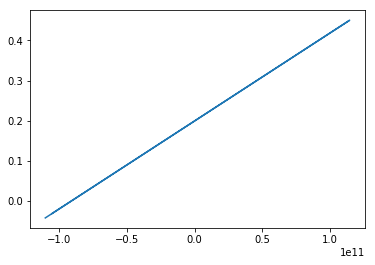

In [220]:
myx = [-1.0541664e+11,5.5555200e+09,1.1468736e+11,8.4983040e+10,-1.1041056e+11]
myy = [-0.03155926,  0.2113739 ,  0.45027835,  0.38525155,-0.04249163]
plt.plot(myx,myy)

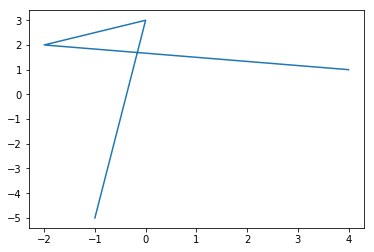

In [221]:
myx = [-1,0,-2,4]
myy = [-5,3,2,1]
plt.plot(myx,myy)

# Error rates

RSE
RSS
R^2 Statistik


In [150]:
R2_within_knr = knr_within.score(test_X_within, test_y_within, sample_weight=None)
R2_outs_knr = knr_outs.score(test_X_outside, test_y_outside, sample_weight=None)
R2_within_linr = linr_within.score(test_X_within, test_y_within, sample_weight=None)
R2_outs_linr = linr_outs.score(test_X_outside, test_y_outside, sample_weight=None)

In [158]:
RSS_within_knr = (sum((knr_within_pred - test_y_within)))**2
RSS_outs_knr = (sum((knr_outs_pred - test_y_within)))**2
RSS_within_linr = (sum((pred_linr_within - test_y_within)))**2
RSS_outs_linr = (sum((pred_linr_outs - test_y_within)))**2

In [161]:
RSE_within_knr = np.sqrt(RSS_within_knr/(len(train_X_within)-2))
RSE_outs_knr = np.sqrt(RSS_outs_knr/(len(train_X_outside)-2))
RSE_within_linr = np.sqrt(RSS_within_linr/(len(train_X_within)-2))
RSE_outs_linr = np.sqrt(RSS_outs_linr/(len(train_X_outside)-2))

In [173]:
type(RSE_within_linr)

numpy.float64

In [195]:
rates_within_df = pd.DataFrame([R2_within_knr,R2_within_linr,RSS_within_knr,RSS_within_linr,RSE_within_knr,RSE_within_linr])
rates_within_df.index = ["R2_knr","R2_linr","RSS_knr","RSS_linr","RSE_knr","RSE_linr"]
rates_within_df.columns = ["within"]
rates_outs_df = pd.DataFrame([R2_outs_knr,R2_outs_linr,RSS_outs_knr,RSS_outs_linr,RSE_outs_knr,RSE_outs_linr])
rates_outs_df.columns = ["outside"]
rates_outs_df.index = ["R2_knr","R2_linr","RSS_knr","RSS_linr","RSE_knr","RSE_linr"]

In [196]:
display(rates_within_df)
display(rates_outs_df)

,within
R2_knr,0.918031
R2_linr,0.640715
RSS_knr,1.407640
RSS_linr,7.613324
RSE_knr,0.032743
RSE_linr,0.076147


,outside
R2_knr,-1.867950
R2_linr,-2.826392
RSS_knr,8668.660200
RSS_linr,4778.275392
RSE_knr,2.569470
RSE_linr,1.907670


In [199]:
rates_all_df = pd.concat([rates_within_df,rates_outs_df],axis = 1)
rates_all_df

,within,outside
R2_knr,0.918031,-1.867950
R2_linr,0.640715,-2.826392
RSS_knr,1.407640,8668.660200
RSS_linr,7.613324,4778.275392
RSE_knr,0.032743,2.569470
RSE_linr,0.076147,1.907670


In [251]:
rates_r2 = pd.DataFrame(rates_all_df.iloc[0:2].unstack()).transpose()
rates_r2
rates_rss = pd.DataFrame(rates_all_df.iloc[2:4].unstack()).transpose()
rates_rse = pd.DataFrame(rates_all_df.iloc[4:6].unstack()).transpose()
print(rates_rse)

     within            outside         
    RSE_knr  RSE_linr  RSE_knr RSE_linr
0  0.032743  0.076147  2.56947  1.90767


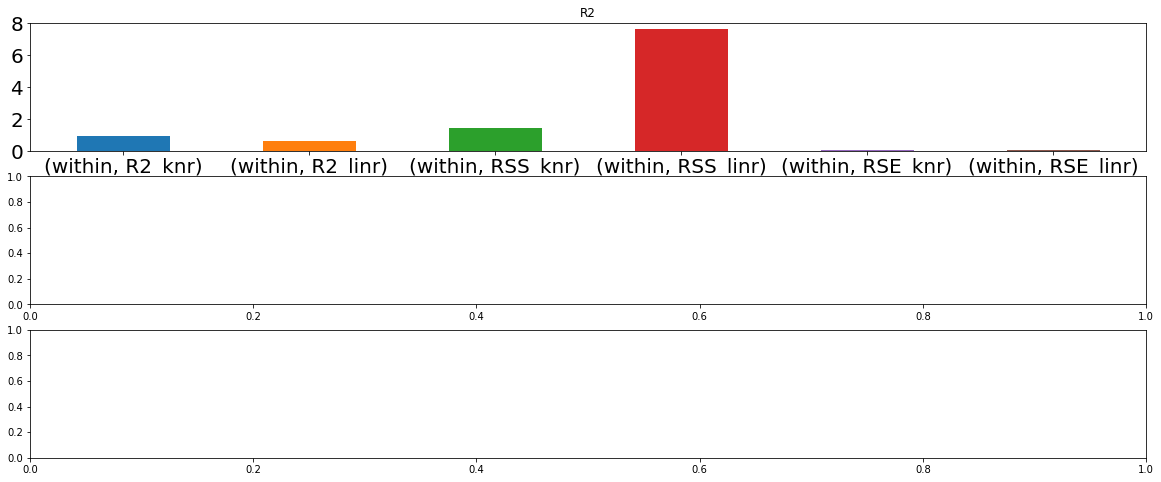

In [263]:
plt.subplot(311)
rates_within_df.unstack().plot(kind='bar',figsize=(20,8),rot=0,title = "R2",fontsize=20)
plt.subplot(312)
#rates_rss.unstack().plot(kind='bar',figsize=(20,8),rot=0,title = "RSS",fontsize=20)
plt.subplot(313)
#rates_rse.unstack().plot(kind='bar',figsize=(20,8),rot=0,title = "RSE",fontsize=20)

In [222]:
#hierarch_names = [["within","outside"],["KNR","LinReg"]]
#fancy_idx = pd.MultiIndex.from_product(hierarch_names)
#fancy_idx
#rates_r2.columns = fancy_idx
#display(rates_r2)

MultiIndex(levels=[['outside', 'within'], ['KNR', 'LinReg']],
           labels=[[1, 1, 0, 0], [0, 1, 0, 1]])